In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_fwf('sentiment labelled sentences/amazon_cells_labelled.txt', sep="", header=None)
df.columns = ['raw']
temp = df['raw'].str.split('\t', n = 1, expand = True)
df['review'] = temp[0]
df['rating'] = temp[1]


In [48]:
df['reviews'] = df.review.str.isupper()

In [46]:
keywords = ['good', 'excellent', 'great', 'highly', 'love', 'satisfied', 'well', 'impressed', 'loved', 'best', 'ideal', 'nice', 'useful', 'comfortable', 'beautiful','super', 'seamlessly', 'sleek', 'winner', 'simpler']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[str(key)] = df.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

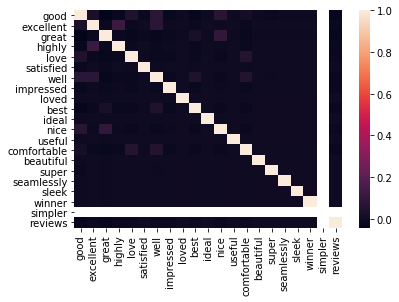

In [47]:
sns.heatmap(df.corr())

In [6]:
sms_raw['spam'] = (sms_raw['spam'] == 'spam')
# Note that if you run this cell a second time everything will become false.
# So... Don't.

In [50]:
data = df[keywords + ['reviews']]
target = df['rating']

In [51]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 374
